# Project 3 – Income, Institution, and Happiness

## Research Question

Are richer countries always happier, and beyond income, which factors best distinguish the happiest countries from the least happy ones?

More concretely:

From 2005 to 2023, how do happiness levels differ across income groups in the World Happiness Report, and what social and institutional factors most separate the happiest and least happy country-years?

## Hypothesis

I hypothesize that:

1. Higher-income countries are, on average, happier. There should be a clear positive relationship between log GDP per capita and life satisfaction (Life Ladder).

2. Income is not the whole story. Among higher-income countries, social support, healthy life expectancy, and low perceived corruption will further distinguish the top-happiness quartile from other countries. In other words, “money buys some happiness,” but strong social ties and trustworthy institutions matter too.

## Dataset

Source: World Happiness Report (compiled from the Gallup World Poll; obtained via Kaggle).

My Data File: world_happiness_report.csv

## Assumptions

This project assumes that:

1. Life Ladder is comparable across countries and over time as a measure of subjective well-being.

2. Log GDP per capita is a reasonable proxy for income differences between countries.

3. Grouping observations into income quartiles based on log_gdp_per_capita is a useful way to define “low-income” vs “high-income” country-years.

4. Taking simple country-year averages is sufficient to reveal broad patterns (even if we ignore within-country inequality).

5. Dropping rows with missing values on key variables does not fundamentally bias the main patterns we observe.

## Getting the data into Python

In this section I load the World Happiness Report dataset into a pandas DataFrame so that I can explore and transform it. The unit of analysis is a country-year (for example, Finland–2019).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

pd.set_option("display.max_columns", 40)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

print("Libraries ready.")

Libraries ready.


In [2]:
file_path = "World Happiness Report.csv"

happiness = pd.read_csv(file_path)
print(f"Raw shape: {happiness.shape[0]:,} rows × {happiness.shape[1]} columns")

happiness.head()

Raw shape: 2,199 rows × 13 columns


,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.72,7.35,0.45,50.50,0.72,0.17,0.88,0.41,0.26,0.61
1,Afghanistan,South Asia,2009,4.40,7.51,0.55,50.80,0.68,0.19,0.85,0.48,0.24,0.61
2,Afghanistan,South Asia,2010,4.76,7.61,0.54,51.10,0.60,0.12,0.71,0.52,0.28,0.30
3,Afghanistan,South Asia,2011,3.83,7.58,0.52,51.40,0.50,0.16,0.73,0.48,0.27,0.31
4,Afghanistan,South Asia,2012,3.78,7.66,0.52,51.70,0.53,0.24,0.78,0.61,0.27,0.44


## First look at the data


Before doing any clever analysis, I want to understand what is in the file: what the columns are, which variables are numeric, and how much missing data there is.

In [ ]:
happiness.columns = happiness.columns.str.strip().str.lower().str.replace(" ", "_")

happiness.columns

Index(['country_name', 'regional_indicator', 'year', 'life_ladder',
       'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices',
       'generosity', 'perceptions_of_corruption', 'positive_affect',
       'negative_affect', 'confidence_in_national_government'],
      dtype='object')

In [4]:
cols_of_interest = [
    "country_name",
    "year",
    "life_ladder",
    "log_gdp_per_capita",
    "social_support",
    "healthy_life_expectancy_at_birth",
    "freedom_to_make_life_choices",
    "generosity",
    "perceptions_of_corruption",
    "positive_affect",
    "negative_affect",
]

cols_of_interest = [c for c in cols_of_interest if c in happiness.columns]
happiness = happiness[cols_of_interest].copy()

happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2199 non-null   object 
 1   year                              2199 non-null   int64  
 2   life_ladder                       2199 non-null   float64
 3   log_gdp_per_capita                2179 non-null   float64
 4   social_support                    2186 non-null   float64
 5   healthy_life_expectancy_at_birth  2145 non-null   float64
 6   freedom_to_make_life_choices      2166 non-null   float64
 7   generosity                        2126 non-null   float64
 8   perceptions_of_corruption         2083 non-null   float64
 9   positive_affect                   2175 non-null   float64
 10  negative_affect                   2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [5]:
happiness.describe().T

,count,mean,std,min,25%,50%,75%,max
year,"2,199.00","2,014.16",4.72,"2,005.00","2,010.00","2,014.00","2,018.00","2,022.00"
life_ladder,"2,199.00",5.48,1.13,1.28,4.65,5.43,6.31,8.02
log_gdp_per_capita,"2,179.00",9.39,1.15,5.53,8.50,9.50,10.37,11.66
social_support,"2,186.00",0.81,0.12,0.23,0.75,0.84,0.90,0.99
healthy_life_expectancy_at_birth,"2,145.00",63.29,6.90,6.72,59.12,65.05,68.50,74.47
freedom_to_make_life_choices,"2,166.00",0.75,0.14,0.26,0.66,0.77,0.86,0.99
generosity,"2,126.00",0.00,0.16,-0.34,-0.11,-0.02,0.09,0.70
perceptions_of_corruption,"2,083.00",0.75,0.19,0.04,0.69,0.80,0.87,0.98
positive_affect,"2,175.00",0.65,0.11,0.18,0.57,0.66,0.74,0.88
negative_affect,"2,183.00",0.27,0.09,0.08,0.21,0.26,0.32,0.70


## 3. Cleaning and creating groups

To compare countries in a meaningful way, I drop rows with missing values
on the key variables and create two new variables:

1. `income_group` – four groups based on log GDP per capita  
2. `happiness_quartile` – four groups based on Life Ladder scores


In [6]:
key_vars = [
    "life_ladder",
    "log_gdp_per_capita",
    "social_support",
    "healthy_life_expectancy_at_birth",
    "freedom_to_make_life_choices",
    "perceptions_of_corruption",
]

clean = happiness.dropna(subset=key_vars).copy()
print(f"After dropping missing key values: {clean.shape[0]:,} rows remain.")

After dropping missing key values: 2,001 rows remain.


In [ ]:
clean["income_group"] = pd.qcut(
    clean["log_gdp_per_capita"],
    q=4,
    labels=["Low income", "Lower-middle", "Upper-middle", "High income"],
)

clean["income_group"].value_counts()

income_group
Low income      501
Lower-middle    500
Upper-middle    500
High income     500
Name: count, dtype: int64

In [ ]:
clean["happiness_quartile"] = pd.qcut(
    clean["life_ladder"],
    q=4,
    labels=["Lowest happiness", "Low–middle", "High–middle", "Highest happiness"],
)

clean["happiness_quartile"].value_counts()

happiness_quartile
Lowest happiness     501
Low–middle           500
High–middle          500
Highest happiness    500
Name: count, dtype: int64

## 4. Income and happiness: are rich countries happier?

Here I directly test the first part of my hypothesis: happiness should
be higher in richer country-years.

In [ ]:
income_summary = (
    clean.groupby("income_group")
    .agg(
        n_obs=("life_ladder", "size"),
        mean_happiness=("life_ladder", "mean"),
        median_happiness=("life_ladder", "median"),
        mean_log_gdp=("log_gdp_per_capita", "mean"),
        mean_social_support=("social_support", "mean"),
        mean_life_exp=("healthy_life_expectancy_at_birth", "mean"),
    )
    .sort_index()
)

income_summary.round(2)

/var/folders/gz/3xjyxwqx3zd0nrs8j35d5j0m0000gn/T/ipykernel_55070/3543563853.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("income_group")


,n_obs,mean_happiness,median_happiness,mean_log_gdp,mean_social_support,mean_life_exp
income_group,,,,,,
Low income,501,4.29,4.34,7.75,0.69,54.50
Lower-middle,500,5.16,5.15,9.03,0.79,62.67
Upper-middle,500,5.65,5.62,9.89,0.85,65.33
High income,500,6.79,6.89,10.75,0.92,70.38


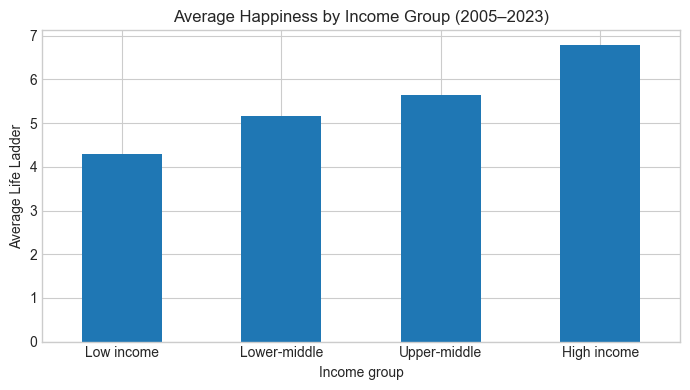

In [10]:
plt.figure(figsize=(7, 4))
income_summary["mean_happiness"].plot(kind="bar")
plt.title("Average Happiness by Income Group (2005–2023)")
plt.xlabel("Income group")
plt.ylabel("Average Life Ladder")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

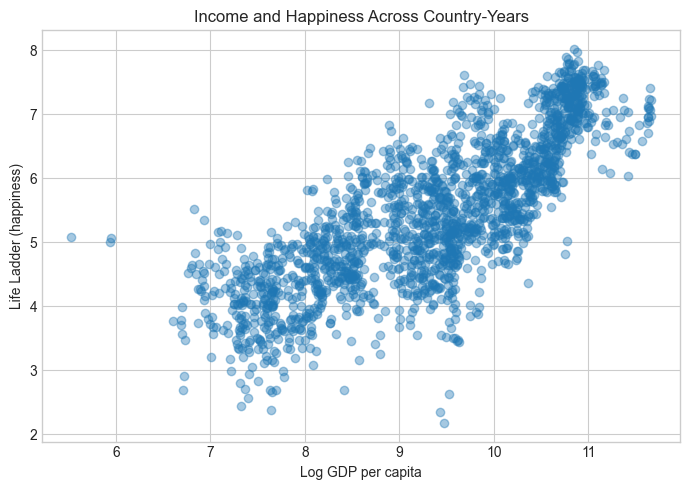

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(clean["log_gdp_per_capita"], clean["life_ladder"], alpha=0.4)
plt.xlabel("Log GDP per capita")
plt.ylabel("Life Ladder (happiness)")
plt.title("Income and Happiness Across Country-Years")
plt.tight_layout()
plt.show()

## 5. What separates the happiest from the least happy?

Income matters, but it is not the whole story. In this section I compare the lowest and highest happiness quartiles on several other factors: social support, healthy life expectancy, freedom, and perceptions of corruption.

In [ ]:
quartile_summary = (
    clean.groupby("happiness_quartile")
    .agg(
        mean_happiness=("life_ladder", "mean"),
        mean_log_gdp=("log_gdp_per_capita", "mean"),
        mean_social_support=("social_support", "mean"),
        mean_life_exp=("healthy_life_expectancy_at_birth", "mean"),
        mean_freedom=("freedom_to_make_life_choices", "mean"),
        mean_generosity=("generosity", "mean"),
        mean_corruption=("perceptions_of_corruption", "mean"),
    )
    .sort_index()
)

quartile_summary.round(2)

/var/folders/gz/3xjyxwqx3zd0nrs8j35d5j0m0000gn/T/ipykernel_55070/2087876799.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("happiness_quartile")


,mean_happiness,mean_log_gdp,mean_social_support,mean_life_exp,mean_freedom,mean_generosity,mean_corruption
happiness_quartile,,,,,,,
Lowest happiness,4.03,8.14,0.69,56.26,0.67,0.00,0.79
Low–middle,5.01,8.99,0.77,61.13,0.69,-0.03,0.82
High–middle,5.86,9.74,0.86,66.06,0.77,-0.04,0.81
Highest happiness,6.98,10.55,0.92,69.43,0.86,0.07,0.57


In [14]:
metrics = [
    "mean_log_gdp",
    "mean_social_support",
    "mean_life_exp",
    "mean_freedom",
    "mean_corruption",
]

plot_df = (
    quartile_summary[metrics]
    .reset_index()
    .melt(id_vars="happiness_quartile", var_name="metric", value_name="value")
)

plot_df.head()

,happiness_quartile,metric,value
0,Lowest happiness,mean_log_gdp,8.14
1,Low–middle,mean_log_gdp,8.99
2,High–middle,mean_log_gdp,9.74
3,Highest happiness,mean_log_gdp,10.55
4,Lowest happiness,mean_social_support,0.69


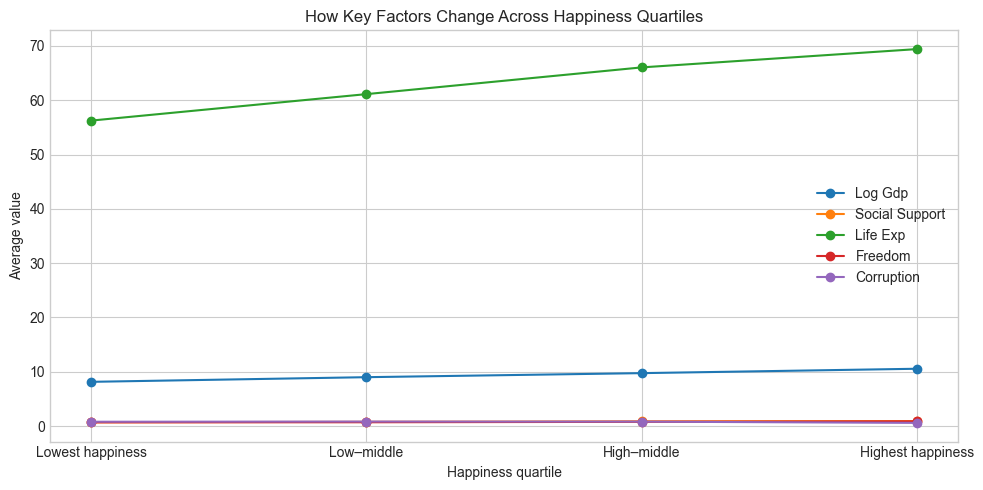

In [ ]:
plt.figure(figsize=(10, 5))
for metric in plot_df["metric"].unique():
    subset = plot_df[plot_df["metric"] == metric]
    plt.plot(
        subset["happiness_quartile"],
        subset["value"],
        marker="o",
        label=metric.replace("mean_", "").replace("_", " ").title(),
    )

plt.title("How Key Factors Change Across Happiness Quartiles")
plt.xlabel("Happiness quartile")
plt.ylabel("Average value")
plt.legend()
plt.tight_layout()
plt.show()

## 6. Happiness over time: global trend

Next, I aggregate the data by year to see how average happiness and income evolve over time in the sample.

In [ ]:
yearly = (
    clean.groupby("year")
    .agg(
        mean_happiness=("life_ladder", "mean"),
        mean_log_gdp=("log_gdp_per_capita", "mean"),
    )
    .sort_index()
)

yearly.round(2)

,mean_happiness,mean_log_gdp
year,,
2005,6.44,10.16
2006,5.22,9.06
2007,5.37,9.16
2008,5.45,9.18
2009,5.46,9.27
2010,5.51,9.39
2011,5.38,9.23
2012,5.42,9.36
2013,5.36,9.34


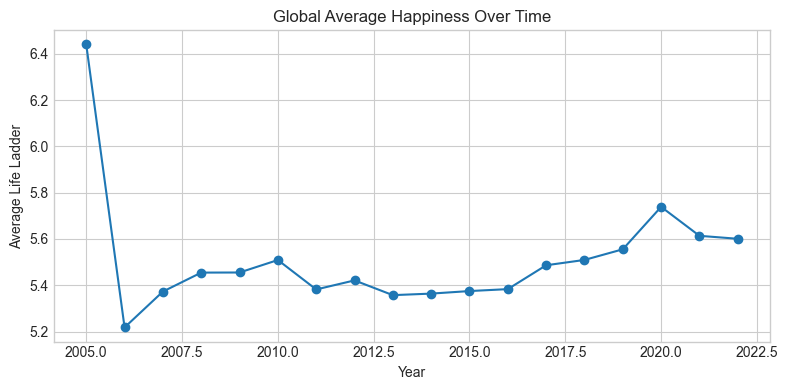

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(yearly.index, yearly["mean_happiness"], marker="o")
plt.title("Global Average Happiness Over Time")
plt.xlabel("Year")
plt.ylabel("Average Life Ladder")
plt.tight_layout()
plt.show()

## 7. Conclusion

**Income and happiness.**  
Across the full sample of country-years, happiness clearly increases from
the low-income group to the high-income group. The scatterplot of log
GDP per capita and Life Ladder also shows a strong positive relationship.
This supports my first hypothesis that richer countries tend to report
higher life satisfaction.

**Beyond income.**  
Comparing happiness quartiles shows that the happiest country-years are
not only richer; they also have higher social support, longer healthy
life expectancy, greater freedom to make life choices, and lower perceived
corruption. These gaps remain even once we restrict attention to the
upper part of the income distribution, which supports the second part of
my hypothesis: institutions and social relationships matter in addition
to income.

**Over time.**  
Global average happiness appears relatively stable over time, even as
average income gradually rises. This is consistent with the idea that
once basic needs are met, extra income has diminishing effects on
happiness.

Overall, the World Happiness Report data suggest that economic growth is
important for well-being, but countries that want to become genuinely
"happier" societies also need to invest in health, social support, and
trustworthy institutions.
